In [12]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import nsfg
import scipy.stats 
from scipy.stats import pearsonr
import thinkplot

In [13]:
# Importing the Dataset
path = "C:/Users/14027/Documents/Graduate_Schoolish/DSC_530/Term_Project/archive/NBA_players_clean.csv"
nba = pd.read_csv(path)
nba

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,...,0,0,0,0,0,0,0,0,0,0
5019,Jim Zoet,1983,1983,1,C,7-1,7.083333,240.0,7,0.3,...,0,0,0,0,0,0,0,0,0,0
5020,Bill Zopf,1971,1971,1,G,6-1,6.083333,170.0,53,2.2,...,0,0,0,0,0,0,0,0,0,0
5021,Ivica Zubac,2017,2022,6,C,7-0,7.000000,240.0,360,8.3,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Standardize column names: lower and replace spaces with _
nba.columns = nba.columns.str.replace(" ", "_")
nba.columns = nba.columns.str.lower()
#Clean for NBA 2000 and above
nba = nba[nba['from'] >= 2000]
#Grouping data for 6'8 and above (Tallest players)
nba = nba[nba['height'] > 6.7]
# nba


In [15]:
# Chapter 2 Histogram and Describe on the data

             player  from    to  years pos   ht  height     wt  g  pts  ...  \
1556    Trey Gilder  2010  2010      1   F  6-9    6.75  185.0  2  1.0  ...   
1956    Steven Hill  2009  2009      1   C  7-0    7.00  248.0  1  2.0  ...   
1979  Randy Holcomb  2006  2006      1   F  6-9    6.75  225.0  4  0.5  ...   

      sixth_man  dpoy  roy  as_mvp  cf_mvp  finals_mvp  mvp  championships  \
1556          0     0    0       0       0           0    0              0   
1956          0     0    0       0       0           0    0              0   
1979          0     0    0       0       0           0    0              0   

      nba_75_team  aba_all-time_team  
1556            0                  0  
1956            0                  0  
1979            0                  0  

[3 rows x 39 columns]
                        player  from    to  years  pos    ht    height     wt  \
111   Martynas Andriuškevičius  2006  2006      1    C   7-2  7.166667  240.0   
326               Keith Benso

count    621.000000
mean      48.157005
std       11.563742
min        0.000000
25%       44.500000
50%       49.900000
75%       53.700000
max      100.000000
Name: efg_percent, dtype: float64

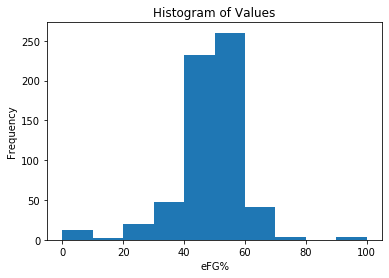

In [16]:
#Creating Histograms for each of the 5 important variables: eFG%:career average effective field goal percentage; 
# To see how well a player or team shoots the ball, 
# we look at field goal percentage (shots made divided by shots attempted).
# However, it is better to use effective field goal percentage since it takes into account the added value of the 3-point shot.
# Since those shots are more difficult, they are given added value in evaluating shooting skills: 40-50% considered good

print(nba[nba['efg%'] == nba['efg%'].max()])
print(nba[nba['efg%'] == nba['efg%'].min()])

nba.rename(columns={'efg%': 'efg_percent'}, inplace=True)
plt.hist(nba['efg_percent'])
plt.xlabel('eFG%')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
#plt.show()
# Summary Statistics
# Mean, Mode, Spread, and Tails 
nba['efg_percent'].describe()

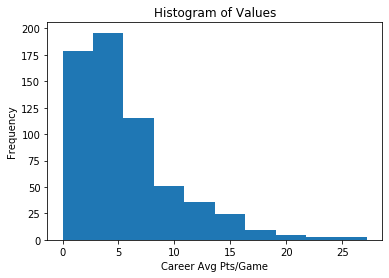

count    621.000000
mean       5.639614
std        4.539207
min        0.000000
25%        2.300000
50%        4.400000
75%        7.600000
max       27.200000
Name: pts, dtype: float64

In [17]:
#Creating Histograms for each of the 5 important variables: PTS
# print(nba[nba['efg%'] == nba['efg%'].max()])
# print(nba[nba['efg%'] == nba['efg%'].min()])

plt.hist(nba['pts'])
plt.xlabel('Career Avg Pts/Game')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()
nba['pts'].describe()

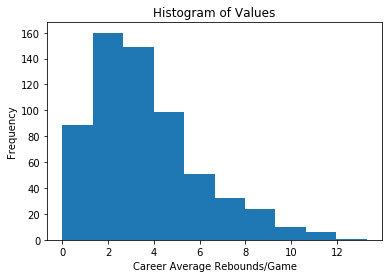

count    621.000000
mean       3.634622
std        2.363986
min        0.000000
25%        1.900000
50%        3.100000
75%        4.800000
max       13.300000
Name: trb, dtype: float64

In [18]:
#Creating Histograms for each of the 5 important variables: rebounds
plt.hist(nba['trb'])
plt.xlabel('Career Average Rebounds/Game')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()
nba['trb'].describe()

            player  from    to  years  pos   ht  height     wt     g   pts  \
2155  LeBron James  2004  2022     19  G-F  6-9    6.75  250.0  1366  27.1   

      ...  sixth_man  dpoy  roy  as_mvp  cf_mvp  finals_mvp  mvp  \
2155  ...          0     0    1       3       0           4    4   

      championships  nba_75_team  aba_all-time_team  
2155              4            1                  0  

[1 rows x 39 columns]


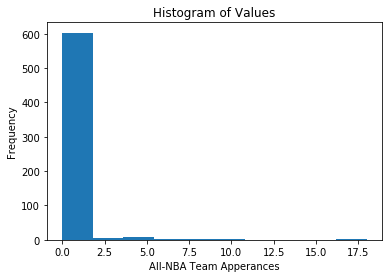

count    621.000000
mean       0.169082
std        1.080059
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       18.000000
Name: all_nba, dtype: float64

In [32]:
#Creating Histograms for each of the 5 important variables: All-Team
print(nba[nba['all_nba'] == nba['all_nba'].max()])
plt.hist(nba['all_nba'])
plt.xlabel('All-NBA Team Apperances')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()
nba['all_nba'].describe()

           player  from    to  years pos   ht  height     wt  g  pts  ...  \
1956  Steven Hill  2009  2009      1   C  7-0     7.0  248.0  1  2.0  ...   

      sixth_man  dpoy  roy  as_mvp  cf_mvp  finals_mvp  mvp  championships  \
1956          0     0    0       0       0           0    0              0   

      nba_75_team  aba_all-time_team  
1956            0                  0  

[1 rows x 39 columns]
         player  from    to  years pos   ht    height     wt  g  pts  ...  \
2085  Mile Ilić  2007  2007      1   C  7-1  7.083333  230.0  5  0.0  ...   

      sixth_man  dpoy  roy  as_mvp  cf_mvp  finals_mvp  mvp  championships  \
2085          0     0    0       0       0           0    0              0   

      nba_75_team  aba_all-time_team  
2085            0                  0  

[1 rows x 39 columns]


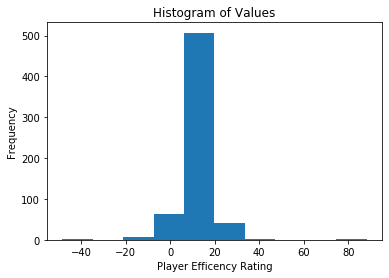

count    621.000000
mean      12.349758
std        7.327277
min      -48.600000
25%        9.900000
50%       12.800000
75%       15.900000
max       88.300000
Name: per, dtype: float64

In [33]:
#Creating Histograms for each of the 5 important variables:PER
print(nba[nba['per'] == nba['per'].max()])
print(nba[nba['per'] == nba['per'].min()])
plt.hist(nba['per'])
plt.xlabel('Player Efficency Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()
nba['per'].describe()

In [21]:
# Chapter 3
import nsfg
import first
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

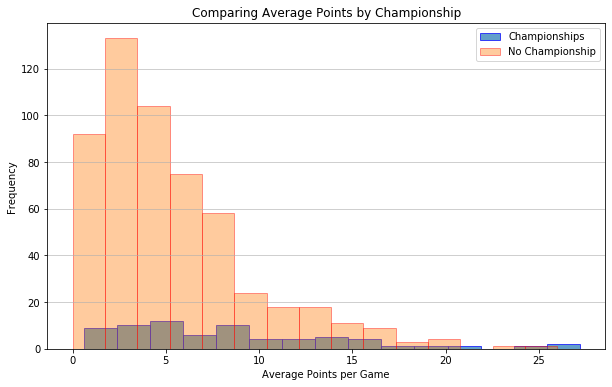

In [34]:
#Create a plot based on a filter (Chapter 3) Part 1:
#Seperating base on championships won vs no championships
champs = nba[nba['championships'] > 0]
no_champs = nba[nba['championships'] == 0]
#Groupd the columns for the histogram for the avg point amounts
group1 = champs['pts']
group2 = no_champs['pts']
#Create the graphs
# Create a figure and axes
# Note that there are way less taller nba players with 
plt.figure(figsize=(10, 6))
plt.hist(group1, bins = 15,alpha=0.7, label = "Championships",edgecolor='blue') #
plt.hist(group2, bins = 15, alpha=0.4, label = "No Championship",edgecolor='red')
plt.xlabel('Average Points per Game')
plt.ylabel('Frequency')
plt.title('Comparing Average Points by Championship')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

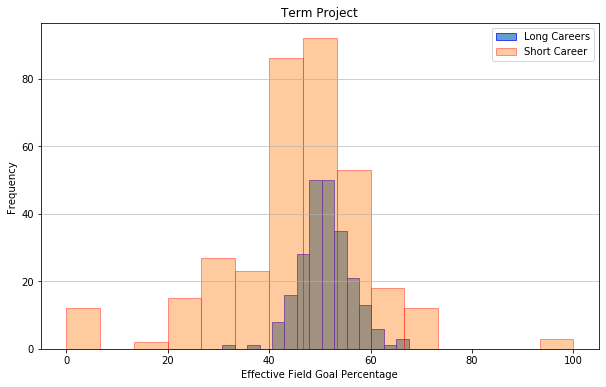

In [23]:
#Create a plot based on a filter (Chapter 3) Part2: Years Played vs efg
#Year played
long_car = nba[nba['years'] > 5]
short_car = nba[nba['years'] <5]
#Groupd the columns for the histogram for the avg point amounts
group1 = long_car['efg_percent']
group2 = short_car['efg_percent']
#Create the graphs
# Create a figure and axes
# Note that the average NBA career length: 4.8 years 
plt.figure(figsize=(10, 6))
plt.hist(group1, bins = 15,alpha=0.7, label = "Long Careers",edgecolor='blue') 
plt.hist(group2, bins = 15, alpha=0.4, label = "Short Career",edgecolor='red')
plt.xlabel('Effective Field Goal Percentage')
plt.ylabel('Frequency')
plt.title('Term Project')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
# Chapter 4

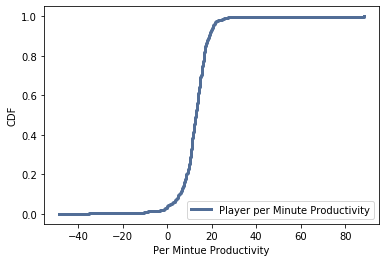

In [25]:
cdf = thinkstats2.Cdf(nba.per, label = 'Player per Minute Productivity')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel = "Per Mintue Productivity", ylabel = "CDF")

# Most players have low per mintue productivity since the curve is steep
# from 0-10. The curve flattens around 20 , which means that very few players ever
# reach that high of productivity

In [40]:
# Chapter 5 Plot 1 analytical distribution

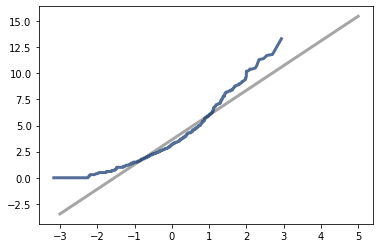

In [42]:
# Rebounds per game: Normal Probability Plot
#Mean and Std
reb_mean = nba.trb.mean()
reb_std = nba.trb.std()

# model line
xs = [-3,5]
fx, fy = thinkstats2.FitLine(xs, inter=reb_mean, slope=reb_std)
thinkplot.Plot(fx,fy, label = 'Career Average Rebounds', color='grey')
# Data split
xs, ys = thinkstats2.NormalProbability(nba.trb)
thinkplot.Plot(xs, ys, label = 'Total Career Rebounds')
thinkplot.xlabel('Value')
thinkplot.ylabel('Frequency')
thinkplot.title('Histogram of Random Data')
thinkplot.show()


0.5284618854456673


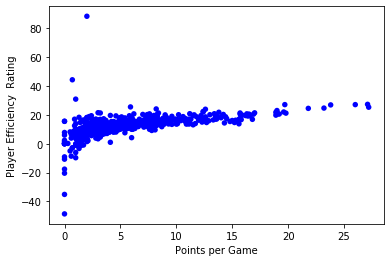

<Figure size 576x432 with 0 Axes>

In [48]:
# Chapter 7: Create 2 Scatterplots Comparing variables
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation.
# Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).
# Points per Game vs Player Productivity

pearson_corr = nba['pts'].corr(nba['per'])
print(pearson_corr)

thinkplot.Scatter(nba.pts, nba.per, alpha = 1)
thinkplot.Show(xlabel = 'Points per Game',
              ylabel = 'Player Efficiency  Rating')

-0.025611513114265853


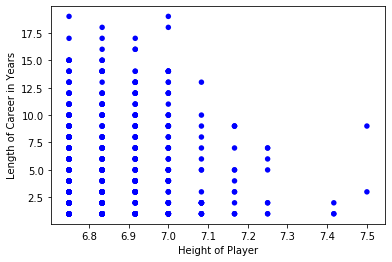

<Figure size 576x432 with 0 Axes>

In [49]:
# Scatterplot #2: Height by Years
pearson_corr = nba['height'].corr(nba['years'])
print(pearson_corr)

thinkplot.Scatter(nba.height, nba.years, alpha = 1)
thinkplot.Show(xlabel = 'Height of Player',
              ylabel = 'Length of Career in Years')


In [30]:
# Chapter 9: Hypothesis Testing
# Permutation Test
import numpy as np
import pandas as pd

# Filter the data for the positions you want to compare
group1 = nba[nba['pos'] == 'C']['pts']
group2 = nba[nba['pos'] == 'F']['pts']

# Observed difference in means
observed_diff = np.mean(group1) - np.mean(group2)

# Combine the groups
combined = np.concatenate([group1, group2])

# Number of permutations
num_permutations = 10000

# Permutation test
perm_diffs = []
for _ in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined)
    # Split into two groups
    perm_group1 = combined[:len(group1)]
    perm_group2 = combined[len(group1):]
    # Calculate the difference in means
    perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
    perm_diffs.append(perm_diff)

# Calculate the p-value
p_value = (np.abs(perm_diffs) >= np.abs(observed_diff)).mean()

print(f"Observed difference: {observed_diff}")
print(f"P-value: {p_value}")

Observed difference: -0.5174721257875534
P-value: 0.1527


In [31]:
# Chapter 11: Regression
# y =  efg_percent
# x = pts, tbr, per
import statsmodels.formula.api as smf
model = smf.poisson('efg_percent ~ pts + trb + per', data = nba)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 4.047821
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            efg_percent   No. Observations:                  621
Model:                        Poisson   Df Residuals:                      617
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                  0.1325
Time:                        14:03:37   Log-Likelihood:                -2513.7
converged:                       True   LL-Null:                       -2897.5
Covariance Type:            nonrobust   LLR p-value:                4.494e-166
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5975      0.012    290.468      0.000       3.573       3.622
pts           -0.0024      0.002     -1.049      0.294      -0.007       0.002
trb            0.0125      0.005      2.722      0.006       0.003       0.021
per            0.0189      0.001     25.619      0.000       0.017       0.020
==============================================================================
"""